In [1]:
# based on code from 

# import...
import numpy as np
import os
import matplotlib.pyplot as plt
import xarray as xr
import warnings
import sys
import pandas as pd
import datetime

os.chdir("/Users/etmu9498/research/code/scripts-winter2023")
import helper_fns_winter2023 as helper_fns

In [2]:
# load the old ships dataset
os.chdir(  "/Users/etmu9498/research/data/ships/")
file1 = open('lsdiaga_1982_2021_sat_ts_5day.txt', 'r')
oldlines = file1.readlines()
# there are a bunch of lines in the total ships file!!
print( len( oldlines))

linecount = len( oldlines)
# print(oldines[linecount-1000:linecount])

i = -1
print(oldlines[i])

1884145
           9999 9999 9999 9999 9999 9999 9999 9999 9999 9999 9999 9999 9999 9999 9999 9999 9999 9999 9999 9999 9999 LAST                    



In [3]:
# load the new ships dataset
os.chdir(  "/Users/etmu9498/research/data/ships/")
file1 = open('lsdiaga_1982_2022_sat_ts.dat', 'r')
Lines = file1.readlines()
# there are a bunch of lines in the total ships file!!
print( len( Lines))

linecount = len( Lines)
# print(Lines[linecount-1000:linecount])

print(Lines[i])

1925150
           9999 9999 9999 9999 9999 9999 9999 9999 9999 9999 9999 9999 9999 9999 9999 9999 9999 9999 9999 9999 9999 9999 9999 9999 9999 9999 9999 9999 9999 LAST                    



In [37]:
dates = []
time_since_start = []
datetimes = []
date_only = []

vmax = []
psurf = []
sheardir = []
shearmag = []
startdate = 0
starttime = 0

strname = "FION"
year = '2022'

header_inds = []
# go through all the lines
for ind in range( len( Lines)):
    # get the heading lines, and look for this TC's cases!
    if 'HEAD' and strname  in Lines[ ind]:
        # only keep 2021 cases
        if Lines[ ind][ 6 : 8] == str( year[ 2:4]):
            header_inds.append( ind)

# print valid header indices
# print( header_inds)
# do this for all headers
for headeri, headerval in enumerate( header_inds):
    # add times to the list! increments of 6 hours
    if headeri == 0:
        time_since_start.append( 0)
        # append starting dates and times
        for i in range( headerval,  len( Lines) ):
            if 'HEAD' in Lines[ i]:
                startdate = Lines[i][6:12]
                starttime = Lines[i][13:15]
                break
        print( 'start date and time updated')
    else:
        # otherwise, find the most recent time and add 6 hours!
        time_since_start.append( time_since_start[-1] + 6)

    # add dates
    for i in range( headerval,  len( Lines) ):
        if 'HEAD' in Lines[ i]:
            dates.append( Lines[i][6:12] )
            break
    # add datetime objects!!
    for i in range( headerval,  len( Lines) ):
        if 'HEAD' in Lines[ i]:
            month = int( Lines[i][8:10] )
            day = int( Lines[i][10:12] )
            hours = int( Lines[i][13:15] )
            datetime_orig = datetime.datetime( int( year), month, day, hours)
            datetimes.append( datetime_orig.strftime( "%m/%d %Hh"))
            date_only.append( datetime_orig.strftime( "%m/%d"))
            break
    # search for vmax!
    for i in range( headerval,  len( Lines) ):
        if 'VMAX' in Lines[i]:
            vmax.append( int( Lines[i][12 : 15]) ) # the last 3 vals for vmax at 0 hours
            break
    # repeat for pressure
    for i in range( headerval,  len( Lines) ):
        if 'MSLP' in Lines[i]:
            psurf.append( int( Lines[i][11:15] )  ) # the last 3 vals for vmax at 0 hours
            break
    # repeat for shear mag and direction
    for i in range( headerval,  len( Lines) ):
        if 'SHRD' in Lines[i]:
            shearmag.append( np.round( float( Lines[i][11:15] ) / 10, 2) ) # the last 3 vals for vmax at 0 hours
            break
    for i in range( headerval,  len( Lines) ):
        if 'SHTD' in Lines[i]:
            sheardir.append( int( Lines[i][11 : 15]) ) # the last 3 vals for vmax at 0 hours
            break

start date and time updated


In [38]:
print(strname)

print(len(datetimes))
print(len(shearmag))

print(datetimes)
print(shearmag)


FION
39
39
['09/14 06h', '09/14 12h', '09/14 18h', '09/15 00h', '09/15 06h', '09/15 12h', '09/15 18h', '09/16 00h', '09/16 06h', '09/16 12h', '09/16 18h', '09/17 00h', '09/17 06h', '09/17 12h', '09/17 18h', '09/18 00h', '09/18 06h', '09/18 12h', '09/18 18h', '09/19 00h', '09/19 06h', '09/19 12h', '09/19 18h', '09/20 00h', '09/20 06h', '09/20 12h', '09/20 18h', '09/21 00h', '09/21 06h', '09/21 12h', '09/21 18h', '09/22 00h', '09/22 06h', '09/22 12h', '09/22 18h', '09/23 00h', '09/23 06h', '09/23 12h', '09/23 18h']
[10.2, 13.8, 13.0, 13.4, 14.8, 13.4, 11.7, 12.6, 14.1, 13.2, 13.9, 14.5, 17.1, 15.4, 11.8, 14.6, 18.0, 19.1, 18.7, 18.7, 19.3, 18.7, 16.8, 16.8, 19.8, 22.6, 18.1, 14.5, 21.2, 21.7, 17.9, 21.3, 22.9, 21.8, 14.4, 11.4, 16.5, 23.9, 28.6]


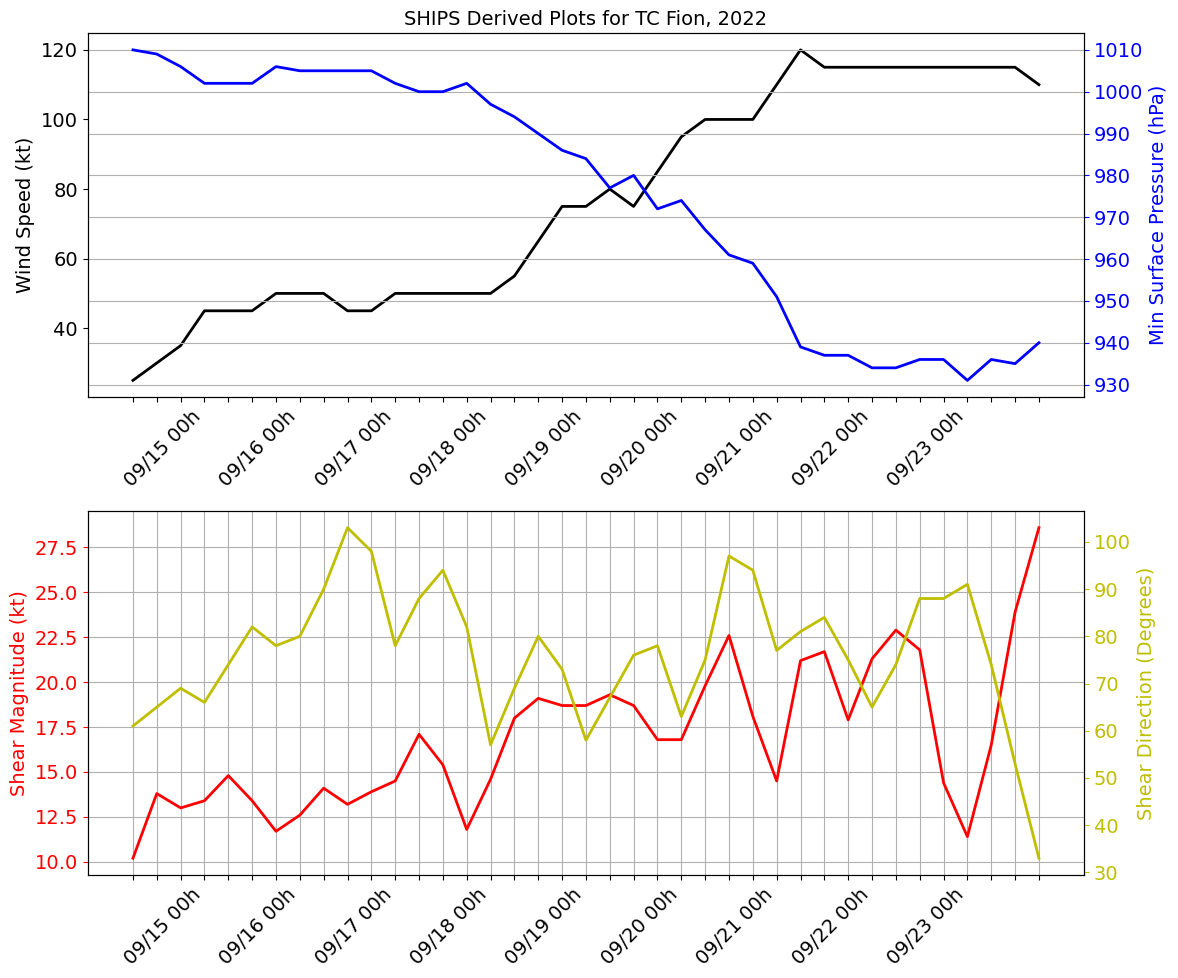

In [39]:
plt.figure( figsize = (12, 10))
helper_fns.change_font_sizes( 14, 14)
lw = 2
n = 4  # Keep every 4th label
tcname = strname.title()

plt.subplot(211)
plt.title( "SHIPS Derived Plots for TC " + tcname + ", " + year)
plt.plot( datetimes, vmax, c='k', linewidth=lw)
plt.ylabel( "Wind Speed (kt)")
plt.xticks(rotation=45, ha="right")

ax = plt.gca()
fig = plt.gcf()
fig.tight_layout()

ax2 = ax.twinx()
ax2.plot( datetimes, psurf, c='b', linewidth=lw)
ax2.set_ylabel( "Min Surface Pressure (hPa)")
ax2.set_xlabel('Date')
ax2.yaxis.label.set_color('b')          #setting up Y-axis label color to blue
ax2.tick_params(axis='y', colors='b')    #setting up X-axis tick color to red

plt.grid('on')

# trimming down the number of x labels
labels = ax.xaxis.get_ticklabels()
for di, dateval in enumerate(datetimes):    
    # remove all labels not at 0 utc
    if dateval[-3:-1] != '00':
        labels[di].set_visible(False)

plt.subplot(212)
plt.plot( datetimes, shearmag, c='r', linewidth=lw)
plt.ylabel( "Shear Magnitude (kt)")
plt.xticks(rotation=45, ha="right")
plt.grid('on')


ax = plt.gca()
ax.yaxis.label.set_color('r')          #setting up Y-axis label color to blue
ax.tick_params(axis='y', colors='r')    #setting up X-axis tick color to red

fig = plt.gcf()
fig.tight_layout()

ax2 = ax.twinx()
ax2.plot( datetimes, sheardir, c='y', linewidth=lw)
ax2.set_ylabel( "Shear Direction (Degrees)")
ax2.set_xlabel('Date')
ax2.yaxis.label.set_color('y')          #setting up Y-axis label color to blue
ax2.tick_params(axis='y', colors='y')    #setting up X-axis tick color to red

# trimming down the number of x labels
labels = ax.xaxis.get_ticklabels()
for di, dateval in enumerate(datetimes):    
    # remove all labels not at 0 utc
    if dateval[-3:-1] != '00':
        labels[di].set_visible(False)

